In [2]:
import os

import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np

from keras.models import model_from_json


In [39]:
weights_path = os.path.join("logs", "model2.4_90classes.hdf5")
arch_path = os.path.join("logs", "model2.4_90classes_architecture.json")
images_path = os.path.join("real_pictures")

In [40]:
all_labels = ['Apple Braeburn', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Dates', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Huckleberry', 'Kaki', 'Kiwi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mangostan', 'Maracuja', 'Melon Piel de Sapo', 'Mulberry', 'Nectarine', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Peach 2', 'Peach Flat', 'Pear', 'Pear Abate', 'Pear Monster', 'Pear Williams', 'Pepino', 'Physalis', 'Physalis with Husk', 'Pineapple', 'Pineapple Mini', 'Pitahaya Red', 'Plum', 'Pomegranate', 'Quince', 'Rambutan', 'Raspberry', 'Redcurrant', 'Salak', 'Strawberry', 'Strawberry Wedge', 'Tamarillo', 'Tangelo', 'Tomato 1', 'Tomato 2', 'Tomato 3', 'Tomato 4', 'Tomato Cherry Red', 'Tomato Maroon', 'Walnut']

In [41]:
print(all_labels)

['Apple Braeburn', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Dates', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Huckleberry', 'Kaki', 'Kiwi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mangostan', 'Maracuja', 'Melon Piel de Sapo', 'Mulberry', 'Nectarine', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Peach 2', 'Peach Flat', 'Pear', 'Pear Abate', 'Pear Monster', 'Pear Williams', 'Pepino', 'Physalis', 'Physalis with Husk

## Prepare pictures

In [42]:
img_labels = os.listdir(images_path)
print(len(img_labels))
print(img_labels)

15
['Apple Braeburn.jpg', 'Apple golden.jpg', 'Banana 2.jpg', 'Banana.jpg', 'Carambula 2.jpg', 'Carambula.jpg', 'Kaki.jpg', 'Kiwi.jpg', 'Kumquat.jpg', 'Lemon 2.jpg', 'Lemon.jpg', 'Maracuja.jpg', 'Peach 2.jpg', 'Peach.jpg', 'Pineapple.jpg']


In [43]:
images = []
for label in img_labels:
    img_path = os.path.join(images_path, label)
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img = cv2.resize(img, (100, 100))
    images.append(img)

In [46]:
def plot_for_class(labels):
    nb_rows = int(len(labels) / 3 + 0.499)
    nb_cols = 3
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(15, 15))

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            if n < len(labels):
                axs[i, j].xaxis.set_ticklabels([])
                axs[i, j].yaxis.set_ticklabels([])
                axs[i, j].set_title(str(n) + " " +  labels[n], fontsize=15)
                axs[i, j].imshow(images[n])
                n += 1    

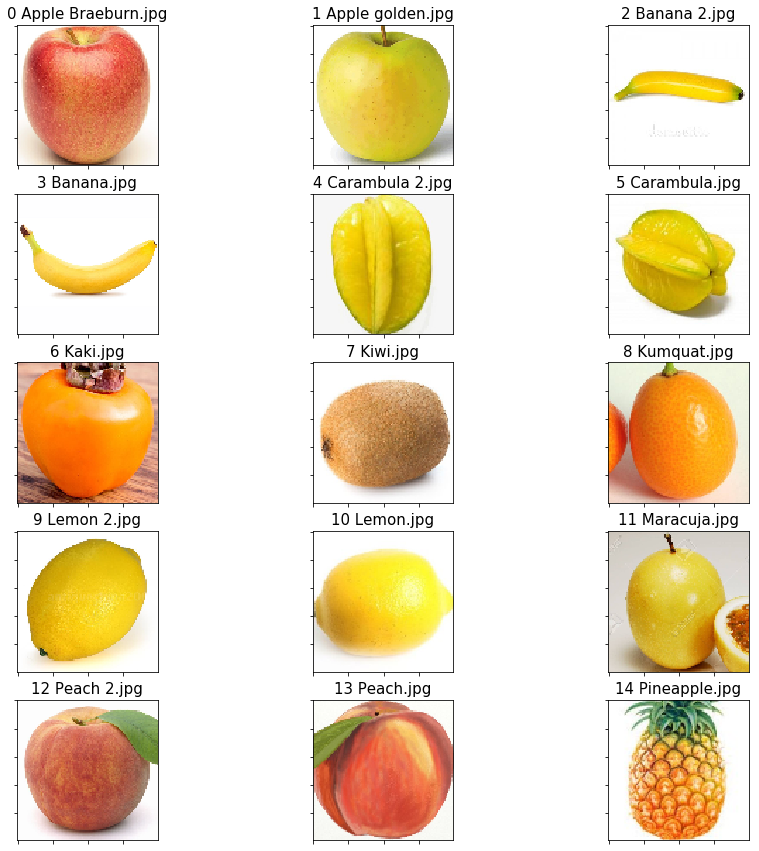

In [47]:
plot_for_class(img_labels)

## Load model

In [11]:
with open(arch_path, "r") as inf:
    json_model = inf.read()
    
model = model_from_json(json_model)
model.load_weights(weights_path)
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1179904   
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
__________

## Predict

In [48]:
%%time
predict = []
for i in range(len(img_labels)):
    image = images[i]
    image = np.expand_dims(image, axis=0)
    image = image / 255.
    probas = model.predict_proba(image)
    probas = np.squeeze(probas)
    
    ranked_list = zip(probas, all_labels)
    ranked_list = sorted(ranked_list, key=lambda x: x[0]) 
    ranked_list = list(reversed(ranked_list))
    ranked_list = ranked_list[: 5]
    predict.append(ranked_list)
    

Wall time: 858 ms


In [51]:
for i in range(len(img_labels)):
    print(i, "Fruit =", img_labels[i], "   Predicted =", predict[i][:2])
    

0 Fruit = Apple Braeburn.jpg    Predicted = [(0.561979, 'Cherry Rainier'), (0.11851086, 'Cantaloupe 2')]
1 Fruit = Apple golden.jpg    Predicted = [(0.84559256, 'Apple Golden 2'), (0.071636535, 'Grapefruit White')]
2 Fruit = Banana 2.jpg    Predicted = [(0.99970394, 'Banana Lady Finger'), (7.9180805e-05, 'Banana')]
3 Fruit = Banana.jpg    Predicted = [(0.8321473, 'Banana Lady Finger'), (0.16346417, 'Banana')]
4 Fruit = Carambula 2.jpg    Predicted = [(0.8037092, 'Carambula'), (0.08143281, 'Quince')]
5 Fruit = Carambula.jpg    Predicted = [(0.9885886, 'Carambula'), (0.003571223, 'Quince')]
6 Fruit = Kaki.jpg    Predicted = [(0.95735604, 'Quince'), (0.012480841, 'Tomato 1')]
7 Fruit = Kiwi.jpg    Predicted = [(0.89014983, 'Kiwi'), (0.054770004, 'Cantaloupe 2')]
8 Fruit = Kumquat.jpg    Predicted = [(0.45655185, 'Lemon Meyer'), (0.18314947, 'Maracuja')]
9 Fruit = Lemon 2.jpg    Predicted = [(0.56673586, 'Lemon Meyer'), (0.1870041, 'Lemon')]
10 Fruit = Lemon.jpg    Predicted = [(0.7449118,

In [52]:
for i in range(len(img_labels)):
    print(i, "Fruit =", img_labels[i], "   Predicted =", predict[i][0][1])

0 Fruit = Apple Braeburn.jpg    Predicted = Cherry Rainier
1 Fruit = Apple golden.jpg    Predicted = Apple Golden 2
2 Fruit = Banana 2.jpg    Predicted = Banana Lady Finger
3 Fruit = Banana.jpg    Predicted = Banana Lady Finger
4 Fruit = Carambula 2.jpg    Predicted = Carambula
5 Fruit = Carambula.jpg    Predicted = Carambula
6 Fruit = Kaki.jpg    Predicted = Quince
7 Fruit = Kiwi.jpg    Predicted = Kiwi
8 Fruit = Kumquat.jpg    Predicted = Lemon Meyer
9 Fruit = Lemon 2.jpg    Predicted = Lemon Meyer
10 Fruit = Lemon.jpg    Predicted = Cherry Wax Yellow
11 Fruit = Maracuja.jpg    Predicted = Maracuja
12 Fruit = Peach 2.jpg    Predicted = Peach
13 Fruit = Peach.jpg    Predicted = Apple Red Yellow 1
14 Fruit = Pineapple.jpg    Predicted = Pineapple


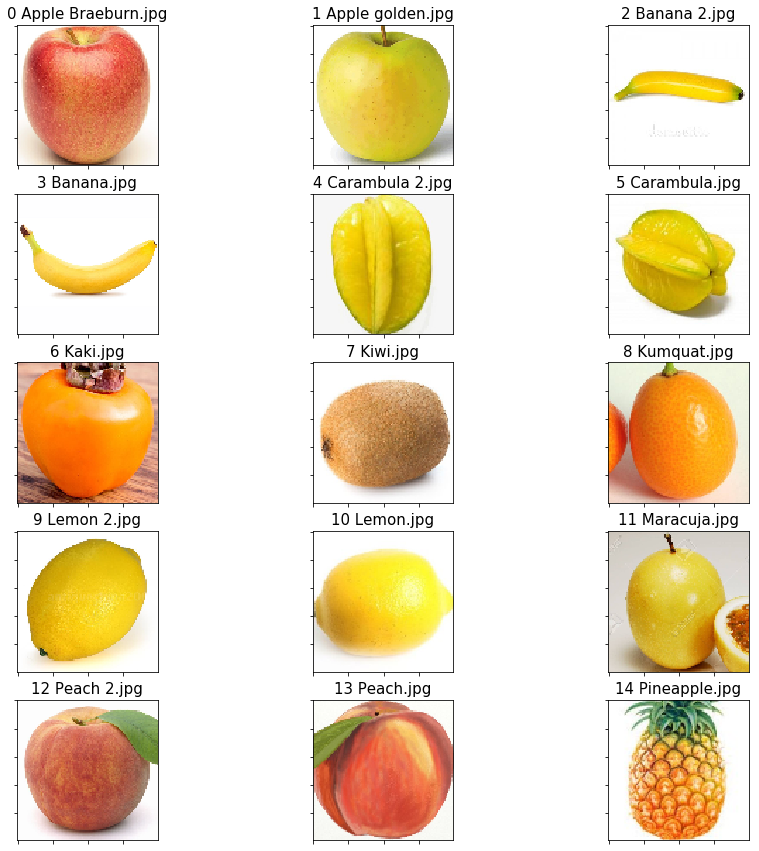

In [53]:
plot_for_class(img_labels)